# データのダウンロード

In [1]:
%%capture
!if [ ! -d train ]; then curl -L -O https://github.com/mitmul/chainer-handson/releases/download/SegmentationDataset/train.zip && unzip train.zip && rm -rf train.zip; fi
!if [ ! -d val ]; then curl -L -O https://github.com/mitmul/chainer-handson/releases/download/SegmentationDataset/val.zip && unzip val.zip && rm -rf val.zip; fi

In [2]:
!ls

sample_data  train  val


# 画像の可視化

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

from glob import glob

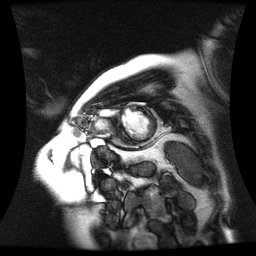

In [4]:
# 入力用の画像データ
Image.open('train/image/000.png')

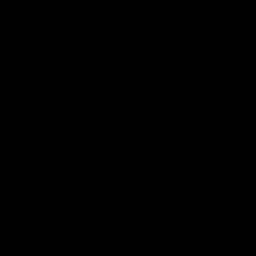

In [5]:
# 出力用の画像データ
Image.open('train/label/000.png')

In [6]:
# 入力用の画像
image = Image.open('train/image/000.png')
image = np.array(image)

# 出力用の画像
label = Image.open('train/label/000.png')
label = np.array(label)

In [7]:
image.shape, label.shape

((256, 256), (256, 256))

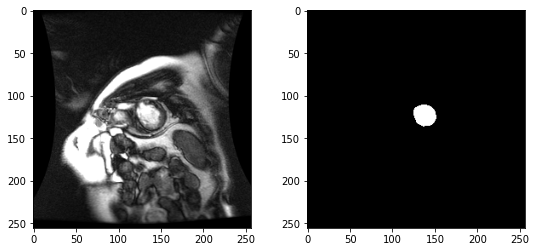

In [8]:
plt.figure(figsize=(9, 4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(label, cmap='gray')

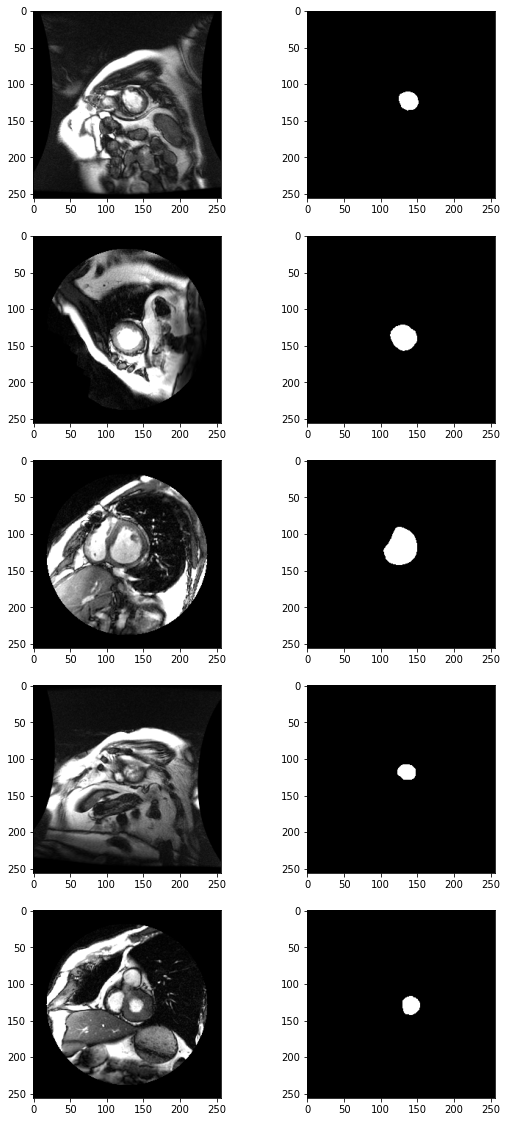

In [9]:
# 複数枚の画像でも確認
n_max_imgs = 5

plt.figure(figsize=(9, 20))
for n in range(n_max_imgs):

    # 入力用の画像データ
    image = Image.open(f'train/image/00{n}.png')
    image = np.array(image)

    # 出力用の画像データ
    label = Image.open(f'train/label/00{n}.png')
    label = np.array(label)

    plt.subplot(n_max_imgs, 2, 2*n+1)
    plt.imshow(image, cmap='gray')

    plt.subplot(n_max_imgs, 2, 2*n+2)
    plt.imshow(label, cmap='gray')

In [10]:
image.shape

(256, 256)

In [11]:
label.shape

(256, 256)

In [12]:
image.min(), image.max()

(0, 255)

In [13]:
label.min(), label.max()

(0, 1)

In [14]:
# 左心室の領域内部のピクセル数
(label==1).sum()

494

In [15]:
# 左心室以外のピクセル数
(label==0).sum()

65042

In [16]:
# 訓練データの入力画像
train_images = sorted(glob('train/image/*.png'))
print(train_images)

['train/image/000.png', 'train/image/001.png', 'train/image/002.png', 'train/image/003.png', 'train/image/004.png', 'train/image/005.png', 'train/image/006.png', 'train/image/007.png', 'train/image/008.png', 'train/image/009.png', 'train/image/010.png', 'train/image/011.png', 'train/image/012.png', 'train/image/013.png', 'train/image/014.png', 'train/image/015.png', 'train/image/016.png', 'train/image/017.png', 'train/image/018.png', 'train/image/019.png', 'train/image/020.png', 'train/image/021.png', 'train/image/022.png', 'train/image/023.png', 'train/image/024.png', 'train/image/025.png', 'train/image/026.png', 'train/image/027.png', 'train/image/028.png', 'train/image/029.png', 'train/image/030.png', 'train/image/031.png', 'train/image/032.png', 'train/image/033.png', 'train/image/034.png', 'train/image/035.png', 'train/image/036.png', 'train/image/037.png', 'train/image/038.png', 'train/image/039.png', 'train/image/040.png', 'train/image/041.png', 'train/image/042.png', 'train/ima

In [17]:
len(train_images)

234

In [18]:
# 訓練データのラベル画像
train_labels = sorted(glob('train/label/*.png'))
print(train_labels)

['train/label/000.png', 'train/label/001.png', 'train/label/002.png', 'train/label/003.png', 'train/label/004.png', 'train/label/005.png', 'train/label/006.png', 'train/label/007.png', 'train/label/008.png', 'train/label/009.png', 'train/label/010.png', 'train/label/011.png', 'train/label/012.png', 'train/label/013.png', 'train/label/014.png', 'train/label/015.png', 'train/label/016.png', 'train/label/017.png', 'train/label/018.png', 'train/label/019.png', 'train/label/020.png', 'train/label/021.png', 'train/label/022.png', 'train/label/023.png', 'train/label/024.png', 'train/label/025.png', 'train/label/026.png', 'train/label/027.png', 'train/label/028.png', 'train/label/029.png', 'train/label/030.png', 'train/label/031.png', 'train/label/032.png', 'train/label/033.png', 'train/label/034.png', 'train/label/035.png', 'train/label/036.png', 'train/label/037.png', 'train/label/038.png', 'train/label/039.png', 'train/label/040.png', 'train/label/041.png', 'train/label/042.png', 'train/lab

In [19]:
len(train_labels)

234

In [20]:
# 検証データの入力画像
val_images = sorted(glob('val/image/*.png'))
print(val_images)

['val/image/000.png', 'val/image/001.png', 'val/image/002.png', 'val/image/003.png', 'val/image/004.png', 'val/image/005.png', 'val/image/006.png', 'val/image/007.png', 'val/image/008.png', 'val/image/009.png', 'val/image/010.png', 'val/image/011.png', 'val/image/012.png', 'val/image/013.png', 'val/image/014.png', 'val/image/015.png', 'val/image/016.png', 'val/image/017.png', 'val/image/018.png', 'val/image/019.png', 'val/image/020.png', 'val/image/021.png', 'val/image/022.png', 'val/image/023.png', 'val/image/024.png', 'val/image/025.png']


In [21]:
len(val_images)

26

In [22]:
# 検証データのラベル画像
val_labels = sorted(glob('val/label/*.png'))
print(val_labels)

['val/label/000.png', 'val/label/001.png', 'val/label/002.png', 'val/label/003.png', 'val/label/004.png', 'val/label/005.png', 'val/label/006.png', 'val/label/007.png', 'val/label/008.png', 'val/label/009.png', 'val/label/010.png', 'val/label/011.png', 'val/label/012.png', 'val/label/013.png', 'val/label/014.png', 'val/label/015.png', 'val/label/016.png', 'val/label/017.png', 'val/label/018.png', 'val/label/019.png', 'val/label/020.png', 'val/label/021.png', 'val/label/022.png', 'val/label/023.png', 'val/label/024.png', 'val/label/025.png']


In [23]:
len(val_labels)

26